# Reproduce Results

## Import Utils and libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%ls

#from google.colab import runtime
#runtime.unassign()

Mounted at /content/drive/
drive/  sample_data/


In [52]:
# Appends the path to our custom module directory
import sys
sys.path.append('/content/drive/MyDrive/JaimeSanchez_AlejandroVara_BrandonAlfaro_DavidIniguez/')

In [3]:
# Appends the path to our custom module directory
import os
import pickle

In [4]:
#!pip install scikit-learn
!pip install cython
!pip install nltk
!pip install datasets
import nltk
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
# Set the HOME environment variable to the desired path
os.environ['HOME'] = '/content/drive/MyDrive/JaimeSanchez_AlejandroVara_BrandonAlfaro_DavidIniguez/'

# Now you can use os.environ['HOME'] to access the new value
home_dir = os.environ['HOME']

#All directories used
data_dir = os.path.join(home_dir, 'data')
fitted_models_dir = os.path.join(home_dir, 'fitted_models')
train_seq_path = os.path.join(fitted_models_dir, 'train_seq.pkl')
model_default_file_path = os.path.join(fitted_models_dir, 'sp')
model_ext_file_path = os.path.join(fitted_models_dir, 'sp_ext')

#Import all libraries, functions and classes needed from utils
exec(open(os.path.join(home_dir, 'utils/utils.py')).read())

In [6]:
# Support libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Skseq modules
from skseq.sequences.id_feature import IDFeatures
from skseq.sequences.extended_feature import ExtendedFeatures
from skseq.sequences.structured_perceptron import StructuredPerceptron

## Perceptron

### Prepare for Evaluation


In [7]:
# Train, Test and Tiny Test sets
train = pd.read_csv(os.path.join(data_dir, 'train_data_ner.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test_data_ner.csv'))
tiny = pd.read_csv(os.path.join(data_dir, 'tiny_test.csv'))

# Words named as 'None' are being considered NA's, fill them as str('None')
train['words'] = train['words'].fillna('None')
test['words'] = test['words'].fillna('None')

X_train, y_train = prepare_data(train)
X_test, y_test = prepare_data(test)
X_tiny, y_tiny = get_tiny_test()

#Create Vocabulary
word_dict, tag_dict, tag_dict_rev = create_vocabulary(X_train, y_train)

#Load Sequence List
if os.path.exists(train_seq_path):
    with open(train_seq_path, 'rb') as f:
        train_seq = pickle.load(f)

In [8]:
# Create True Tags
train_tag_pos = [[tag_dict[i] for i in list_y] for list_y in y_train]
y_true_train = [tag for array in train_tag_pos for tag in array]

tiny_tag_pos = [[tag_dict[i] for i in list_y] for list_y in y_tiny]
y_true_tiny = [tag for array in tiny_tag_pos for tag in array]

test_tag_pos = [[tag_dict[i] for i in list_y] for list_y in y_test]
y_true_test = [tag for array in test_tag_pos for tag in array]

### Evaluate Models

#### Load Model

In [ ]:
feature_mapper = IDFeatures(train_seq)
feature_mapper.build_features()


sp = StructuredPerceptron(word_dict, tag_dict, feature_mapper)
sp.load_model(dir=model_default_file_path)

#### Train set

In [ ]:
y_train_pred = predict_StructuredPerceptron(sp, X_train)

Predicting tags: 100%|██████████| 38366/38366 [08:10<00:00, 78.19sequence/s]


Accuracy: 0.9683
F1 Score: 0.9682


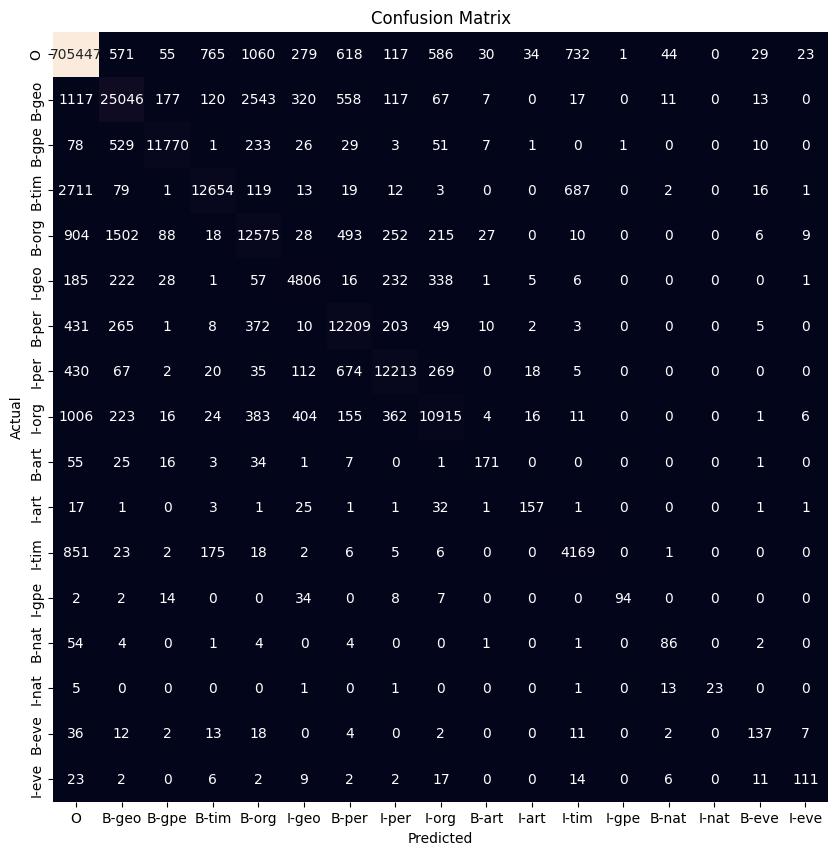

In [ ]:
results(y_true_train, y_train_pred, tag_dict_rev)

#### Tiny test set

In [ ]:
#Compute predictions
y_tiny_pred = predict_StructuredPerceptron(sp, X_tiny)

Predicting tags: 100%|██████████| 13/13 [00:00<00:00, 80.96sequence/s]


Accuracy: 0.9041
F1 Score: 0.9036


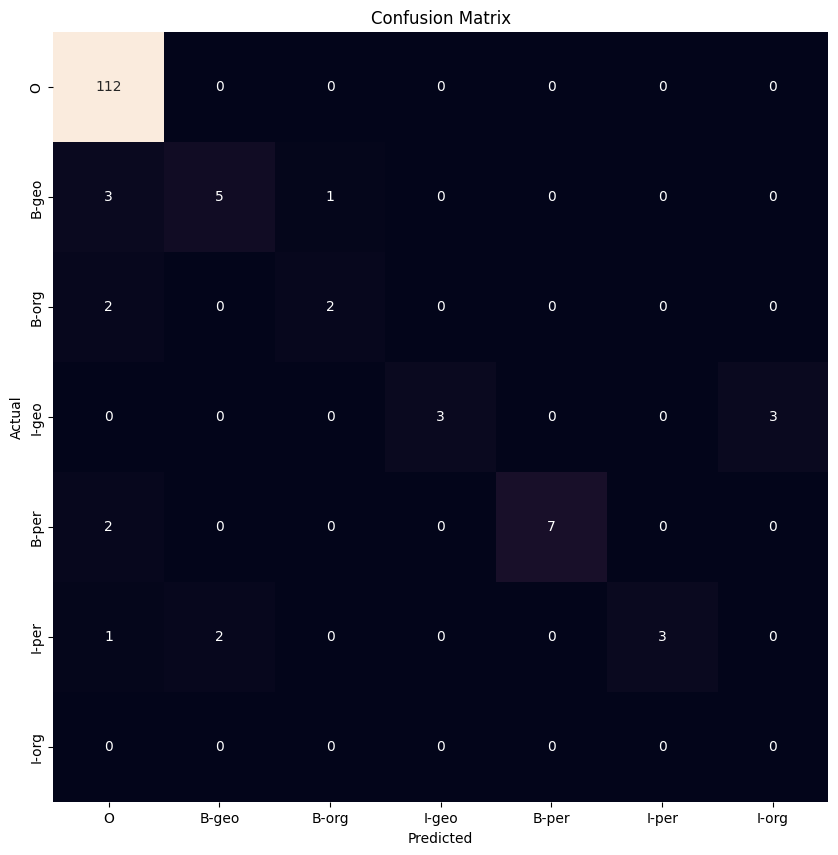

In [ ]:
results(y_true_tiny, y_tiny_pred, tag_dict_rev)

In [ ]:
print_tiny_test_prediction(X_tiny, sp, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-geo might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

The/O programmers/O from/O Barchelona/O cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

Jack/B-per London/B-geo went/O to/O Parris/O ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/I-per and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/O would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O U.S.A/O though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-org States/I-org of/I-org America/I-org though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 

Robin/O does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 

Apple/O is/O a/O great/O company/O ./O 

I/O really/O lov

#### Test set

In [ ]:
y_test_pred = predict_StructuredPerceptron(sp, X_test)

Predicting tags: 100%|██████████| 38367/38367 [08:09<00:00, 78.42sequence/s]


Accuracy: 0.8808
F1 Score: 0.8579


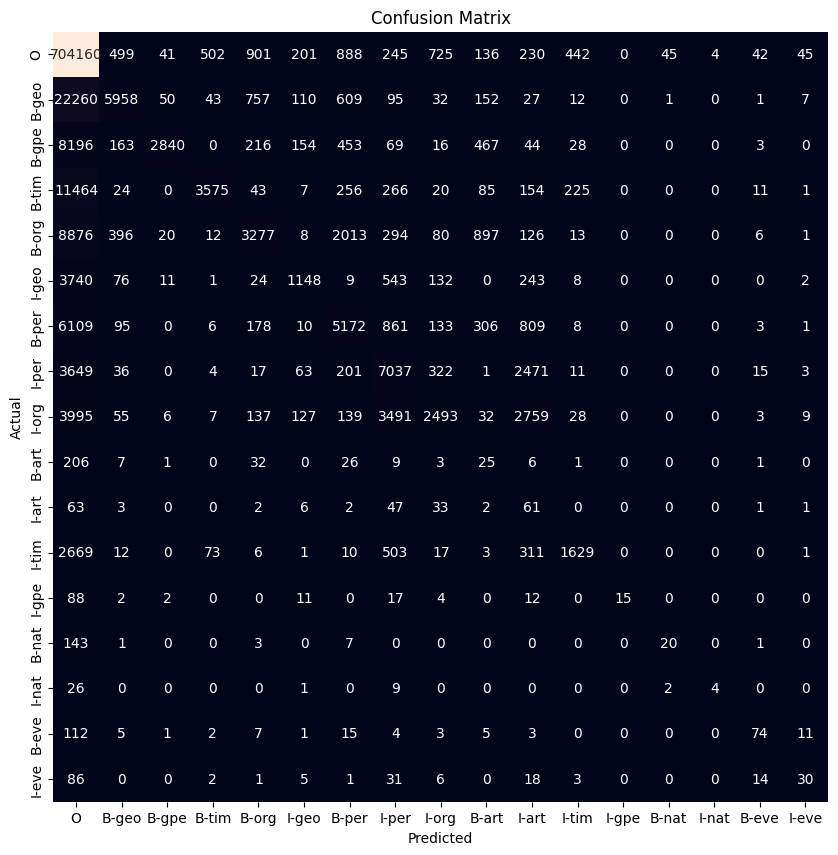

In [ ]:
results(y_true_test, y_test_pred, tag_dict_rev)

## Structured Perceptron with Extended Features

#### Load Model

In [ ]:
feature_mapper_ext = ExtendedFeatures(train_seq)
feature_mapper_ext.build_features()


sp_ext = StructuredPerceptron(word_dict, tag_dict, feature_mapper_ext)
sp_ext.load_model(dir=model_ext_file_path)

### Evaluation

#### Train set

In [ ]:
y_train_pred = predict_StructuredPerceptron(sp_ext, X_train)

Predicting tags: 100%|██████████| 38366/38366 [08:47<00:00, 72.69sequence/s]


Accuracy: 0.9637
F1 Score: 0.9644


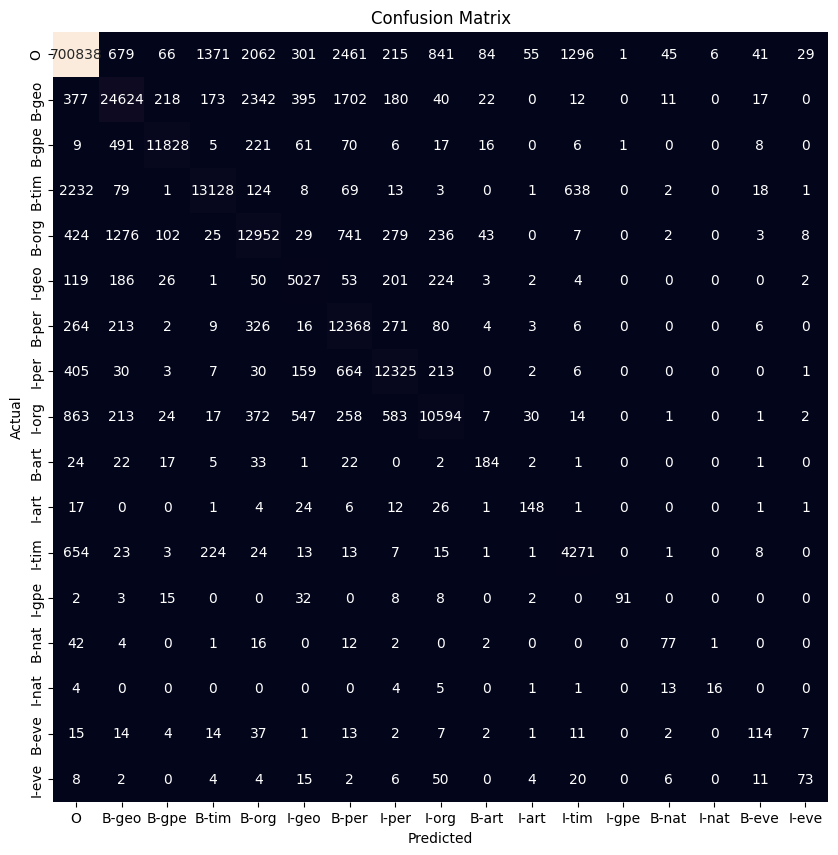

In [ ]:
results(y_true_train, y_train_pred, tag_dict_rev)

#### Tiny test set

In [ ]:
#Compute predictions
y_tiny_pred = predict_StructuredPerceptron(sp_ext, X_tiny)

Predicting tags: 100%|██████████| 13/13 [00:00<00:00, 161.02sequence/s]


Accuracy: 0.9452
F1 Score: 0.9370


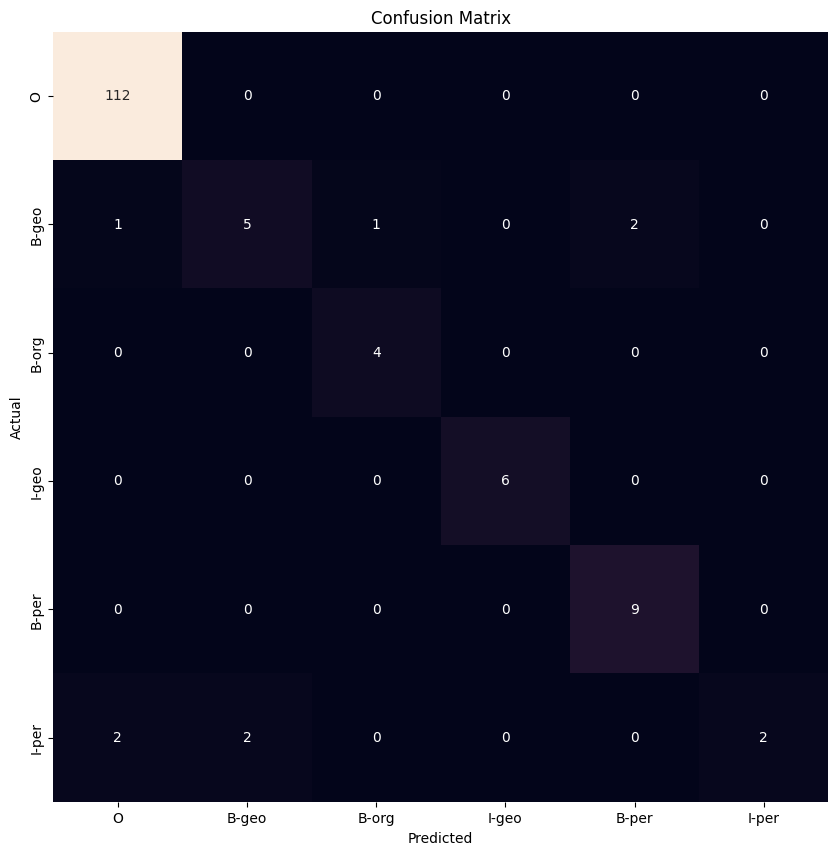

In [ ]:
results(y_true_tiny, y_tiny_pred, tag_dict_rev)

In [ ]:
print_tiny_test_prediction(X_tiny, sp_ext, tag_dict_rev)

The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

The/O programmers/O from/O Barchelona/B-per cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 

Jack/B-per London/B-geo went/O to/O Parris/B-per ./O 

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 

Bill/B-per gates/O and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/B-org would/O become/O such/O a/O big/O company/O ./O 

The/O president/O of/O U.S.A/O though/O they/O could/O win/O the/O war/O ./O 

The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo though/O they/O could/O win/O the/O war/O ./O 

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 

Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 

Apple/B-org is/O a/O great/O company/O ./O 



#### Test set

In [ ]:
y_test_pred = predict_StructuredPerceptron(sp_ext, X_test)

Predicting tags: 100%|██████████| 38367/38367 [08:33<00:00, 74.65sequence/s]


Accuracy: 0.9010
F1 Score: 0.9029


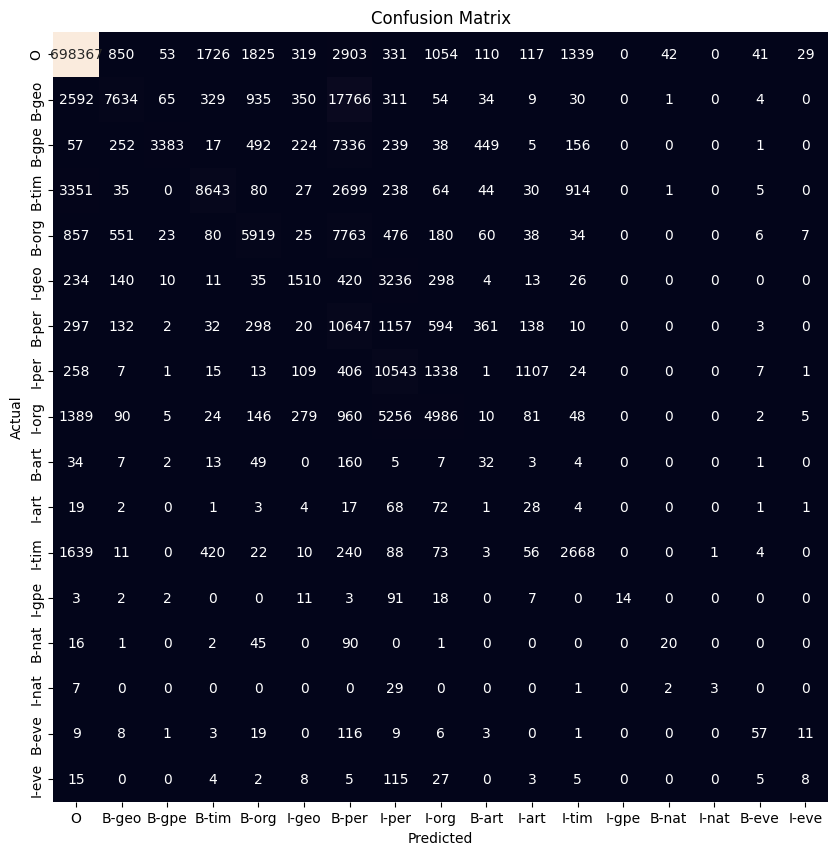

In [ ]:
results(y_true_test, y_test_pred, tag_dict_rev)

## Transformers

#### Some processes before predicting

In [9]:
tags = np.unique(train['tags'].values)
index2tag, tag2index = create_dict (tags)

In [10]:
label_names = list (tag2index.keys())
print (label_names)

['O', 'B-art', 'I-art', 'B-eve', 'I-eve', 'B-geo', 'I-geo', 'B-gpe', 'I-gpe', 'B-nat', 'I-nat', 'B-org', 'I-org', 'B-per', 'I-per', 'B-tim', 'I-tim']


#### Load model and pipeline

In [11]:
from transformers import DistilBertForTokenClassification, DistilBertTokenizerFast
from transformers import pipeline

filetransformers = os.path.join(fitted_models_dir, './ner_dl_distilbert')

model = DistilBertForTokenClassification.from_pretrained(filetransformers)
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-cased')

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### Training test

In [12]:
pre_train = preprocess_tuples(X_train) #lo de los puntos
Y_train_labels = create_labels (y_train, tag2index)

In [13]:
relevant_indices = [[i for i,label in enumerate(y) if label != 0] for y in Y_train_labels]
relevant_labels = [[str(label) for label in y if label != 0] for y in Y_train_labels]

In [35]:
recon_new = []
label_new = []
relevant_preds = []

for i in range (len(pre_train)):
  # if i%1000 == 0:
  #   print (i)
  sentence = reconstruct_sentence (pre_train[i])
  ner_results = nlp(sentence)

  _, reco_sentence, reco_label = process_prediction (ner_results, pre_train[i])

  recon_new.append(reco_sentence)
  label_new.append(reco_label)
  relevant_preds.append([label_new[i][j] for j in relevant_indices[i]])

Accuracy: 0.89
Weighted F1-Score: 0.91


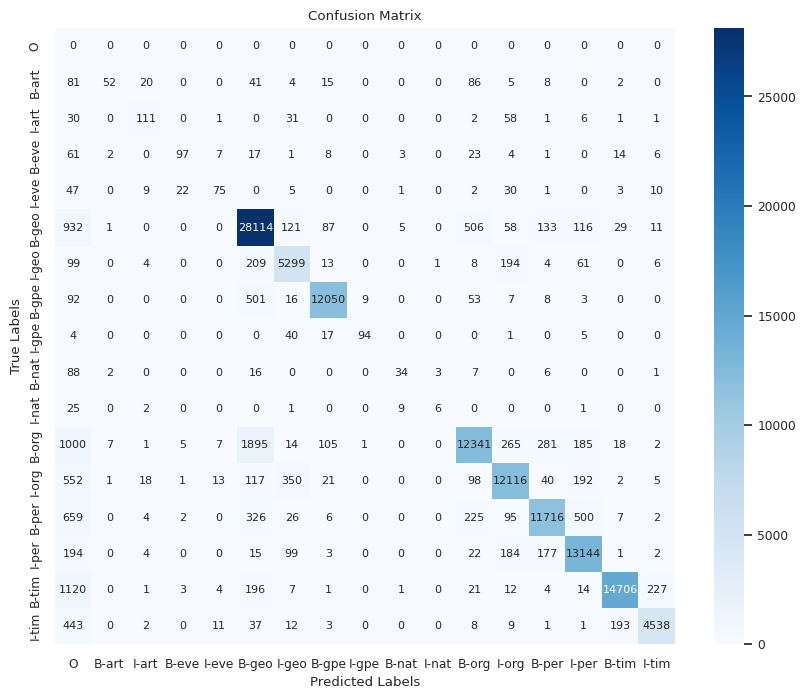

In [43]:
print_transformers_results (relevant_preds, relevant_labels, label_names)

### Test set

In [44]:
pre_test = preprocess_tuples(X_test) #lo de los puntos
Y_test_labels = create_labels (y_test, tag2index)

In [45]:
relevant_indices = [[i for i,label in enumerate(y) if label != 0] for y in Y_test_labels]
relevant_labels = [[str(label) for label in y if label != 0] for y in Y_test_labels]

In [46]:
recon_new = []
label_new = []
relevant_preds = []

for i in range (len(pre_test)):
  # if i%1000 == 0:
  #   print (i)
  sentence = reconstruct_sentence (pre_test[i])
  ner_results = nlp(sentence)

  _, reco_sentence, reco_label = process_prediction (ner_results, pre_test[i])

  recon_new.append(reco_sentence)
  label_new.append(reco_label)
  relevant_preds.append([label_new[i][j] for j in relevant_indices[i]])


Accuracy: 0.67
Weighted F1-Score: 0.70


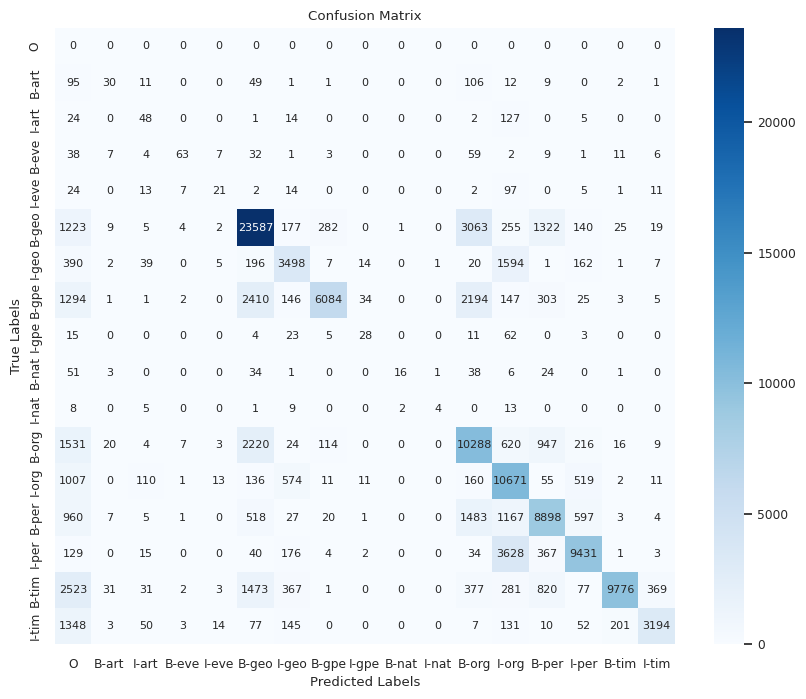

In [47]:
print_transformers_results (relevant_preds, relevant_labels, label_names)

### Tiny test

In [54]:
tiny = pd.read_csv(os.path.join(data_dir, 'tiny_test.csv'))
X_tinytest, y_tinytest = prepare_data(tiny)
pre_tiny = preprocess_tuples (X_tinytest)

In [55]:
recon_new_tiny = []
label_new_tiny = []

for i in range (len(pre_tiny)):
  # if i%1 == 0:
  #   print (i)
  sentence = reconstruct_sentence (pre_tiny[i])
  ner_results = nlp(sentence)

  _, reco_sentence, reco_label = process_prediction (ner_results, pre_tiny[i])

  recon_new_tiny.append(reco_sentence)
  label_new_tiny.append(reco_label)

Accuracy: 0.99
Weighted F1-Score: 0.99


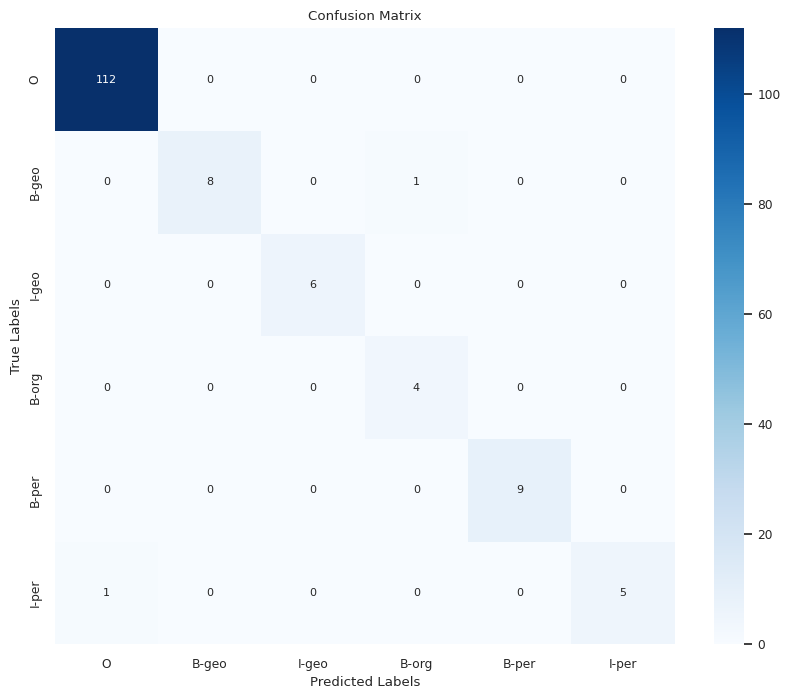

In [99]:
y_tinytest_index = [[str(tag2index[tag]) for tag in y] for y in y_tinytest]
print_transformers_results (label_new_tiny, y_tinytest_index, ['O', 'B-geo', 'I-geo', 'B-org', 'B-per', 'I-per'], tiny=True)

In [108]:
label_new_tiny_tags= [[index2tag[i] for i in list(map(int, vector))] for vector in label_new_tiny]

In [111]:
####Tiny frases en orden: frase original, tag original y prediccion nuestra
for i in range(len(label_new_tiny)):
  print(X_tinytest[i])
  print(y_tinytest[i])
  print(label_new_tiny_tags[i])
  print("\n")

['The', 'programmers', 'from', 'Barcelona', 'might', 'write', 'a', 'sentence', 'without', 'a', 'spell', 'checker', '.']
['O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


['The', 'programmers', 'from', 'Barchelona', 'cannot', 'write', 'a', 'sentence', 'without', 'a', 'spell', 'checker', '.']
['O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


['Jack', 'London', 'went', 'to', 'Parris', '.']
['B-per', 'I-per', 'O', 'O', 'B-geo', 'O']
['B-per', 'I-per', 'O', 'O', 'B-geo', 'O']


['Jack', 'London', 'went', 'to', 'Paris', '.']
['B-per', 'I-per', 'O', 'O', 'B-geo', 'O']
['B-per', 'I-per', 'O', 'O', 'B-geo', 'O']


['Bill', 'gates', 'and', 'Steve', 'jobs', 'never', 'thought', 'Microsoft', 'would', 'become', 'such', 'a', 'big', 'company', '.']
['B-per', 'I-per', 'O', 'B-per', 'I-per', 'O', 'O', 'B-org', 'O', 'O', 'O